In [143]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('~/Desktop/chewy/chewydogfood_new.csv')
df2 = pd.read_csv('~/Desktop/chewy2/chewycatfood.csv',encoding='latin-1')
df=pd.concat([df1,df2],ignore_index=True)

In [144]:
print(df.count())
#print(df1.count())
#print(df2.count())

brand             4278
category          4278
ingredient        4244
name              4278
page              5023
price             4276
rating            4278
reviews_number    4003
unit              1814
dtype: int64


In [145]:
def strip_obj(col):
    return col.str.strip()

df[df.columns.difference(['page','reviews_number'])]=df[df.columns.difference(['page','reviews_number'])].apply(strip_obj, axis=1)  #trim data

In [146]:
print(df.count())

brand             4278
category          4278
ingredient        4244
name              4278
page              5023
price             4276
rating            4278
reviews_number    4003
unit              1814
dtype: int64


In [147]:
df.head()

,brand,category,ingredient,name,page,price,rating,reviews_number,unit
0,By Taste of the Wild,"Dog,Food","Crude Protein,32.0% min,Crude Fat,18.0% min,Cr...",Taste of the Wild High Prairie Grain-Free Dry ...,1,$48.99,/assets/img/ratings/rating-4_7.png,1701.0,30-lb bag
1,By CANIDAE,"Dog,Food","Crude Protein ,24.0% min,Crude Fat ,14.5% min,...",CANIDAE Life Stages All Life Stages Formula Dr...,1,$56.99,/assets/img/ratings/rating-4_7.png,552.0,44-lb bag
2,By Blue Buffalo,"Dog,Food","Crude Protein,20.0% min,Crude Fat,12.0% min,Cr...",Blue Buffalo Basics Limited Ingredient Grain-F...,1,$51.99,/assets/img/ratings/rating-4_7.png,207.0,22-lb bag
3,By Blue Buffalo,"Dog,Food","Crude Protein,28.0% min,Crude Fat,13.0% min,Cr...",Blue Buffalo Wilderness Rocky Mountain Recipe ...,1,$51.99,/assets/img/ratings/rating-4_7.png,224.0,NaN
4,By Blue Buffalo,"Dog,Food","Crude Protein,24.0% min,Crude Fat,14.0% min,Cr...",Blue Buffalo Freedom Adult Chicken Recipe Grai...,1,$47.99,/assets/img/ratings/rating-4_8.png,247.0,24-lb bag


In [148]:
df['ingredient'].iloc[5]

'Crude Protein,32.0% min,Crude Fat,18.0% min,Crude Fiber,4.0% max,Moisture,10.0% max,Zinc,150 mg/kg min,Selenium,0.35 mg/kg min,Vitamin E,150 IU/kg min,Omega 6 Fatty Acids,2.4% min,Omega 3 Fatty Acids,0.4% min,Total Microorganisms,1,000,000 CFU/lb min'

In [13]:
#dict(map(lambda x: x.strip().rsplit(',', 1), df.iloc[1, 2].split('%')))

In [14]:
#re.split('min,|max,',df.iloc[1, 2])

In [15]:
#dict(map(lambda x: x.strip().rsplit(',',1) , re.split('min,|max,',df.iloc[1, 2])))                                                                        

In [149]:
from itertools import chain
a=df.ingredient[0]
#re.findall('([a-zA-Z]+\s?[a-zA-Z]+),\d',a)


#find the list of unique ingridient
def glist(x): 
    return [ i for i in re.split(',',x) if (i=='' or i[0].isalpha())\
            and i[0:3]!='Add' and i[0:4]!='Dogs' and i[0:4]!='Feed'\
            and i.upper()[0:4]!='OVER' and i[0:5]!='Small' and i[0:6]!='Medium'\
            and i[0:3]!='Toy' and i.upper()[0:2]!='UP'\
            and i[0:3]!='lbs' and i[0:7]!= 'Puppies' and i[0:4]!= 'Less'\
            and i[0:5]!= 'Large' and i[0:6]!='Highly' and i[0:5]!='Giant'\
            and i.upper()[0:5]!='UNDER' and i.upper()[0:6]!='WEIGHT'\
            and i.upper()[0:10]!='TRANSITION' and i.upper()[0:10]!='MINI ADULT'\
            and i.upper()[0:9]!=r'MG/KG MIN' and i.upper()[0:3]!='DAY'\
            and i.upper()[0:5]!='ADULT' and i.upper()[0:4]!='PLUS' and i.upper()[0:5]!='START'\
            and i.upper()[0:6]!='KITTEN' and i.upper()[0:4]!='KEEP' \
            and i.upper()[0:5]!=r'IU/KG' and i.upper()[0:5]!='FULLY' \
            and i.upper()[0:4]!='FREE' and i.upper()[0:3]!='FOR'\
            and i.upper()[0:4]!='FEED' and i.upper()[0:11]!='EXTRA LARGE'\
            and i.upper()[0:6]!='DURING' and i.upper()[0:4]!='CATS'\
            and i.upper()[0:5]!='ABOVE' and i.upper()[0:3]!='ADD'\
            and i.upper()[0:3]!='MAX' and i.upper()[0:3]!='MIN'\
            and i.upper()[0:3]!=r'N/A' and i.upper()[0:3]!='NAN'\
            and i.upper()[0:8]!='NOT LESS' and i.upper()[0:6]!='SENIOR' and i.upper()[0:2]!=r'X-'
           ]

df.ingredient=df.ingredient.astype(np.str)
from itertools import chain
def chain_list(nested_list):
    return list(chain(*nested_list))

list_ind=chain_list(df.ingredient.map(lambda x: glist(x)))

list_ind=set([x.strip().upper() for x in list_ind])
list_ind=list(list_ind)  #export to csv and create a new tag in new column

In [150]:
list_ind_csv=['EPA  EICOSAPENTAENOIC ACID    DHA  DOCOSAHEXAENOIC ACID ',
 'L ASCORBYL 2 POLYPHOSPHATE   SOURCE OF VITAMIN C ',
 'L ASCORBYL 2 POLYPHOSPHATE  SOURCE OF VITAMIN C ',
 'TOTAL MICROORGANISMS  LACTOBACILLUS ACIDOPHILUS',
 'ALPHA LINOLENIC ACID  AN OMEGA 3 FATTY ACID ',
 'ALPHA LINOLENIC ACID  OMEGA 3 FATTY ACID ',
 'CHONDROITIN SULFATE  NATURALLY OCCURRING ',
 'MICROORGANISMS  LACTOBACILLUS ACIDOPHILUS',
 'VITAMIN E  DL ASLPHA TOCOPHERYL ACETATE ',
 'APPROXIMATE NUMBER OF 8 OZ CUPS PER DAY',
 'LINOLEIC ACID  AN OMEGA 6 FATTY ACID ',
 'ASCORBIC ACID  SOURCE OF VITAMIN C  ',
 'LINOLEIC ACID   OMEGA 6 FATTY ACIDS ',
 'ASCORBIC ACID  SOURCE OF VITAMIN C ',
 'LINOLEIC ACID  OMEGA 6 FATTY ACID ',
 'GLUCOSAMINE  NATURALLY OCCURRING ',
 'TOTAL LACTIC ACID MICROORGANISMS ',
 'TOTAL LACTIC ACID MICROORGANISMS',
 'ALPHA LINOLENIC ACID  OMEGA 3 ',
 'GESTATING 5 8  ',
 'BIFIDOBACTERIUM THERMOPHILUM',
 'BREEDING MARES AND STALLIONS',
 'CALCIUM TO PHOSPHOROUS RATIO',
 'GESTATING 1 2  ',
 'MANNANOLIGOSACCHARIDES  MOS ',
 'CALCIUM   PHOSPHOROUS RATIO',
 'DOCOSAHEXAENOIC ACID  DHA  ',
 'EICOSAPENTAENOIC ACID  EPA ',
 'EPA  EICOSAPENTAENOIC ACID ',
 'FUCTOOLIGOSACCHARIDES  FOS ',
 'VITAMIN A  RETINYL ACETATE ',
 'VITAMIN D  CHOLECALCIFEROL ',
 'ABSORBIC ACID*  VITAMIN C ',
 'ALPHA LINOLENIC ACID  ALA ',
 'ASCORBIC ACID  VITAMIN C  ',
 'ASCORBIC ACID  VITMAIN C  ',
 'CHONDROITIN SULFATE  MIN  ',
 'DHA  DOCOSAHEXAENOIC ACID ',
 'DHA  DOCOSOHEXAENOIC ACID ',
 'DOCOSAHEXAENOIC ACID  DHA ',
 'DOCOSOHEXAENOIC ACID  DHA ',
 'EICOSAPENTAENOIC ACID  EPA',
 'GLUCOSAMINE HYDROCHLORIDE ',
 'LACTIC ACID MICROORGANISMS',
 'OMEGA 3 FATTY ACIDS  MIN  ',
 'OMEGA 6 FATTY ACIDS  MIN  ',
 'ASCORBIC ACID  VITAMIN C ',
 'ASCORBIC ACIF  VITAMIN C ',
 'ASCROBIC ACID  VITAMIN C ',
 'CALCIUM PHOSPHOROUS RATIO',
 'GLUCOSAMINE HYDROCHLORIDE',
 'LACTOBACILLUS ACIDOPHILUS',
 'MOISTEN   FEED FREQUENTLY',
 'OMEGA 6 FATTY ACIDS TOTAL',
 'ASCORBIC ACID  VITAMIN C',
 'ASCORBIC ACID  VITAMINC ',
 'CALIUM PHOSPHOROUS RATIO',
 'DOCOSOHEXAENOICACID DHA ',
 'LACOBACILUUS ACIDOPHILUS',
 'LINOLENIC ACID  OMEGA 3 ',
 'OMEGA 3  LINOLENIC ACID ',
 'TOTAL BACILLUS ORGANISMS',
 'ENCAPSULATED PROBIOTICS',
 'LINOLEIC ACID  OMEGA 6 ',
 'OMEGA 3 FATTY ACIDS MIN',
 'OMEGA 6  LINOLEIC ACID ',
 'OMEGA 6 FATTY ACIDS MIN',
 'PYRIDOXINE  VITAMIN B6 ',
 'SELENIUM 0 35 MG KG MIN',
 'BIFIDOBACTERIUM LONGUM',
 'FRUCTOOLIGOSACCHARIDES',
 'LINOLENIC ACID OMEGA 3',
 'OMEGA   3 FATTY ACIDS ',
 'OMEGA   6 FATTY ACIDS ',
 'SELENIUM  45 MG KG MIN',
 'EICOSAPENTAENOIC ACID',
 'LINOLEIC ACID OMEGA 6',
 'MANNANOLIGOACCHARIDES',
 'OMEGA  6 FATTY ACIDS ',
 'OMEGA   3 FATTY ACIDS',
 'OMEGA   6 FATTY ACIDS',
 'PRODUCE   SUPPLEMENTS',
 'TOTAL MICRO ORGANISMS',
 'TOTAL MICROORGANISMS ',
 'TOTAL MICROORGANSISMS',
 'ALPHA LINOLENIC ACID',
 'CHONDROITIN SULFATE ',
 'CHONDROITIN SULPHATE',
 'DOCOSAHEXAENOIC ACID',
 'ENTEROCOCCUS FAECIUM',
 'LACTIC ACID BACTERIA',
 'METABOLIZABLE ENERGY',
 'OMEGA 3 FATTY ACIDS ',
 'OMEGA 6 FATTY ACIDS ',
 'TOTAL MICROORGANISMS',
 'ASH  MAX  6 50% MAX',
 'BACILLIUS COAGULANS',
 'BACILLUS COAGULANS ',
 'CALCIUM PHOSPHOROUS',
 'CARBOHYDRATES  NFE ',
 'CHONDROITIN SULFATE',
 'CRUDE PROTEIN  MIN ',
 'FATTY ACIDS OMEGA 3',
 'FATTY ACIDS OMEGA 6',
 'GLUCOSAMINE SULFATE',
 'MAGNESIUM 0 14% MAX',
 'OMEGA 3 FATTY ACIDS',
 'OMEGA 6 FATTY ACIDS',
 'OMEGA 3 FATTY ACID ',
 'ORGANIC INGREDIENTS',
 'BACILLUS COAGULANS',
 'CARBOHYDRATE   NFE',
 'CHODROITIN SULFATE',
 'COSAHEXAENOIC ACID',
 'GLUCOSAMINE  MIN  ',
 'OMEGA 3 FATTY ACID',
 'OMEGA 6 FATTY ACID',
 'BACILLUS SUBTILIS',
 'CRUDE FIBER  MAX ',
 'CRUDE PROTEIN MIN',
 'TAURINE 0 05% MIN',
 'TOTAL ISOFLAVONES',
 'ARACHIDONIC ACID',
 'CARBOHYDRATE NFE',
 'OMEGA3FATTYACIDS',
 'OMEGA6FATTYACIDS',
 'PHOSPHORUS  MIN ',
 'TOTAL OMEGA 3 FA',
 'TOTAL OMEGA 6 FA',
 'CRUDE FAT  MIN ',
 'CRUDE FIBER MAX',
 'ENZYMES  LIPASE',
 'GLUCOSAMINE HCL',
 'MAGNESIUM  MAX ',
 'ABSORBIC ACID ',
 'ASCORBIC ACID ',
 'BETA CAROTENE ',
 'CRUDE MOISTURE',
 'LINEOLEIC ACID',
 'LINOLENIC ACID',
 'MICROORGANISMS',
 'MOISTURE  MAX ',
 'PHOSPHORUS  P ',
 'VITAMIN E MIN ',
 'ALPHA AMYLASE',
 'ASCORBIC ACID',
 'BETA CAROTENE',
 'CA TO P RATIO',
 'CALCIUM  MIN ',
 'CARBOHYDRATES',
 'CRUDE FAT MIN',
 'CRUDE PROTEIN',
 'EVERY 10+ LBS',
 'LINOLEIC ACID',
 'LINOLIEC ACID',
 'MOTHER’S MILK',
 'SELENIUM  SE ',
 'VITAMIN A MIN',
 'VITAMIN E MIN',
'ABSORBIC ACID',
 'BONE CONTENT',
 'CALCIUM  CA ',
 'CARBOHYDRATE',
 'CRUDEPROTEIN',
 'GLUCOSAMINE ',
 'L CARNITINE ',
 'MOISTURE MAX',
 'VITAMIN E 35',
 'ASH CONTENT',
 'CHONDROITIN',
 'CRUDE FIBER',
 'CRUDE FIBRE',
 'GLUCOSAMINE',
 'L CARNITINE',
 'OMEGA 3 DHA',
 'PHOSPHEROUS',
 'PHOSPHOROUS',
 'TAURINE MIN',
 'AD LIBITUM',
 'CRUDEFIBER',
 'FOLIC ACID',
 'I CARNITIE',
 'INULIN FOS',
 'L ARGININE',
 'METHIONINE',
 'ORGAN MEAT',
 'PHOSPHORUS',
 'PHOSPOROUS',
 'PYRIDOXINE',
 'RIBOFLAVIN',
 'TAURINE DM',
 'VITAMIN D3',
 'VITAMINE E',
 'CRUDE ASH',
 'CRUDE FAT',
 'CRUDE OIL',
 'DHA   EPA',
 'EPA   DHA',
 'IRON  FE ',
 'MAGNESIUM',
 'MANGANESE',
 'PHOSPORUS',
 'VITAMIN A',
 'VITAMIN C',
 'VITAMIN D',
 'VITAMIN E',
 'ZINC  ZN ',
 'ARGININE',
 'CAROTENE',
 'CHLORIDE',
 'CRUDEFAT',
 'IRON 225',
 'ASH MAX',
 'AVERAGE',
 'DHA MIN'
]

In [151]:
list_tag=[
'EPA',
'VITAMIN_C',
'VITAMIN_C',
'MICRO_ORGANISMS',
'OMEGA3',
'OMEGA3',
'CHONDROITIN',
'LACOBACILUUS_ACIDOPHILUS',
'VITAMIN_E',
'DUMMY',
'OMEGA6',
'VITAMIN_C',
'OMEGA6',
'VITAMIN_C',
'OMEGA6',
'GLUCOSAMINE',
'LACTIC_ACID',
'LACTIC_ACID',
'OMEGA3',
'GLUCOSAMINE',
'BIFIDOBACTERIUM',
'DUMMY',
'CALCIUM',
'GLUCOSAMINE',
'MOS',
'CALCIUM',
'DHA',
'EPA',
'EPA',
'FOS',
'VITAMIN_A',
'VITAMIN_D',
'VITAMIN_C',
'OMEGA3',
'VITAMIN_C',
'VITAMIN_C',
'CHONDROITIN',
'DHA',
'DHA',
'DHA',
'DHA',
'EPA',
'GLUCOSAMINE',
'LACTIC_ACID',
'OMEGA3',
'OMEGA6',
'VITAMIN_C',
'VITAMIN_C',
'VITAMIN_C',
'CALCIUM',
'GLUCOSAMINE',
'LACOBACILUUS_ACIDOPHILUS',
'DUMMY',
'OMEGA6',
'VITAMIN_C',
'VITAMIN_C',
'CALCIUM',
'DHA',
'LACOBACILUUS_ACIDOPHILUS',
'OMEGA3',
'OMEGA3',
'BACILLIUS',
'ENCAPSULATED_PROBIOTICS',
'OMEGA6',
'OMEGA3',
'OMEGA6',
'OMEGA6',
'VITAMIN_B6',
'SELENIUM',
'BIFIDOBACTERIUM',
'FOS',
'OMEGA3',
'OMEGA3',
'OMEGA6',
'SELENIUM',
'EPA',
'OMEGA6',
'MOS',
'OMEGA6',
'OMEGA3',
'OMEGA6',
'DUMMY',
'MICRO_ORGANISMS',
'MICRO_ORGANISMS',
'MICRO_ORGANISMS',
'OMEGA3',
'CHONDROITIN',
'CHONDROITIN',
'DHA',
'ENTEROCOCCUS_FAECIUM',
'LACTIC_ACID',
'METABOLIZABLE_ENERGY',
'OMEGA3',
'OMEGA6',
'MICRO_ORGANISMS',
'ASH',
'BACILLIUS',
'BACILLIUS',
'CALCIUM',
'CARBOHYDRATE',
'CHONDROITIN',
'PROTEIN',
'OMEGA3',
'OMEGA6',
'GLUCOSAMINE',
'MAGNESIUM',
'OMEGA3',
'OMEGA6',
'OMEGA3',
'ORGANIC_INGREDIENTS',
'BACILLIUS',
'CARBOHYDRATE',
'CHONDROITIN',
'COSAHEXAENOIC_ACID',
'GLUCOSAMINE',
'OMEGA3',
'OMEGA6',
'BACILLIUS',
'FIBER',
'PROTEIN',
'TAURINE',
'ISOFLAVONES',
'ARA',
'CARBOHYDRATE',
'OMEGA3',
'OMEGA6',
'PHOSPHOROUS',
'OMEGA3',
'OMEGA6',
'FAT',
'FIBER',
'ENZYMES',
'GLUCOSAMINE',
'MAGNESIUM',
'VITAMIN_C',
'VITAMIN_C',
'CARNITINE',
'MOISTURE',
'LINEOLEIC_ACID',
'LINEOLEIC_ACID',
'LACOBACILUUS_ACIDOPHILUS',
'MOISTURE',
'PHOSPHOROUS',
'VITAMIN_E',
'OMEGA3',
'VITAMIN_C',
'CARNITINE',
'DUMMY',
'CALCIUM',
'CARBOHYDRATE',
'FAT',
'PROTEIN',
'DUMMY',
'LINEOLEIC_ACID',
'LINEOLEIC_ACID',
'MOTHER’S_MILK',
'SELENIUM',
'VITAMIN_A',
'VITAMIN_E',
'VITAMIN_C',
'BONE',
'CALCIUM',
'CARBOHYDRATE',
'PROTEIN',
'GLUCOSAMINE',
'CARNITINE',
'MOISTURE',
'VITAMIN_E',
'ASH',
'CHONDROITIN',
'FIBER',
'FIBER',
'GLUCOSAMINE',
'CARNITINE',
'OMEGA3',
'PHOSPHOROUS',
'PHOSPHOROUS',
'TAURINE',
'AD_LIBITUM',
'FIBER',
'FOS',
'CARNITINE',
'FOS',
'ARGININE',
'METHIONINE',
'ORGAN MEAT',
'PHOSPHOROUS',
'PHOSPHOROUS',
'VITAMIN_B6',
'RIBOFLAVIN',
'TAURINE',
'VITAMIN_D',
'VITAMIN_E',
'ASH',
'FAT',
'OIL',
'DHA',
'EPA',
'IRON',
'MAGNESIUM',
'MANGANESE',
'PHOSPHOROUS',
'VITAMIN_A',
'VITAMIN_C',
'VITAMIN_D',
'VITAMIN_E',
'ZIN',
'ARGININE',
'CARNITINE',
'CHLORIDE',
'FAT',
'IRON',
'ASH',
'DUMMY',
'DHA'
]

In [152]:
import re
list_ind2=[re.sub('[^A-Za-z0-9]+', ' ',x) for x in list_ind_csv]

In [153]:
#create indredient origin and tags reference dictionary
#export list of ingridient and tag each in excel and format the list 
#(e.g. put quotes around item)

ind_dict=dict(zip(list_ind2,list_tag))

In [154]:
ind_dict

{'ABSORBIC ACID': 'VITAMIN_C',
 'ABSORBIC ACID ': 'VITAMIN_C',
 'ABSORBIC ACID VITAMIN C ': 'VITAMIN_C',
 'AD LIBITUM': 'AD_LIBITUM',
 'ALPHA AMYLASE': 'OMEGA3',
 'ALPHA LINOLENIC ACID': 'OMEGA3',
 'ALPHA LINOLENIC ACID ALA ': 'OMEGA3',
 'ALPHA LINOLENIC ACID AN OMEGA 3 FATTY ACID ': 'OMEGA3',
 'ALPHA LINOLENIC ACID OMEGA 3 ': 'OMEGA3',
 'ALPHA LINOLENIC ACID OMEGA 3 FATTY ACID ': 'OMEGA3',
 'APPROXIMATE NUMBER OF 8 OZ CUPS PER DAY': 'DUMMY',
 'ARACHIDONIC ACID': 'ARA',
 'ARGININE': 'ARGININE',
 'ASCORBIC ACID': 'VITAMIN_C',
 'ASCORBIC ACID ': 'VITAMIN_C',
 'ASCORBIC ACID SOURCE OF VITAMIN C ': 'VITAMIN_C',
 'ASCORBIC ACID VITAMIN C': 'VITAMIN_C',
 'ASCORBIC ACID VITAMIN C ': 'VITAMIN_C',
 'ASCORBIC ACID VITAMINC ': 'VITAMIN_C',
 'ASCORBIC ACID VITMAIN C ': 'VITAMIN_C',
 'ASCORBIC ACIF VITAMIN C ': 'VITAMIN_C',
 'ASCROBIC ACID VITAMIN C ': 'VITAMIN_C',
 'ASH CONTENT': 'ASH',
 'ASH MAX': 'ASH',
 'ASH MAX 6 50 MAX': 'ASH',
 'AVERAGE': 'DUMMY',
 'BACILLIUS COAGULANS': 'BACILLIUS',
 'BACIL

In [155]:
def result(ele):
    pattern = re.compile(r'\b(' + '|'.join(ind_dict.keys()) + r')\b')
    return pattern.sub(lambda x: ind_dict[x.group()], ele)  
#function to translate ingredient to standard ingredient tags

In [156]:
temp_ind_list= [re.sub('[^A-Za-z0-9,\.%]+', ' ',x) for x in df['ingredient'].tolist()]

In [157]:
df['ind_tag_list']=[result(x.upper()) for x in temp_ind_list]  
#create the column for translated list of ingredient tags

In [158]:
df['ind_tag_list'].iloc[0]

'PROTEIN,32.0% MIN,FAT,18.0% MIN,FIBER,4.0% MAX,MOISTURE,10.0% MAX,ZINC,150 MG KG MIN,SELENIUM,0.35 MG KG MIN,VITAMIN_E,150 IU KG MIN,OMEGA6,2.8% MIN,OMEGA3,0.3% MIN,MICRO_ORGANISMS,1,000,000 CFU LB MIN'

In [159]:
#convert ingredient tag column in df to dictionary
def split_ind(x):
    if type(x)==type('') and x!='':
        return  [re.sub('[^A-Za-z0-9,\.%]+', ' ',element).strip() for element in re.split('MIN,|MAX,',x)]
    else:
        return ['DUMMY,DUMMY']
    
    
def split_dic(x):
    return list(map(lambda x:  tuple( re.sub('[^A-Za-z0-9\.%]+', '',x).strip() for x in x.strip().rsplit(',',1))\
                    if len(tuple(x.strip().rsplit(',',1)))==2 else ('DUMMY','DUMMY') ,x))

temp_list=df['ind_tag_list'].map(lambda x: split_ind(x))
# #type(temp_list)

# dict(split_dic(temp_list.iloc[1]))
for element in temp_list[:500]:
    try:
        dict(split_dic(element))
    except:
        print(split_dic(element))
        
#convert tag list column to ingredient dictionaries, the preprocessing for split columns
df['ind_dict']=[dict(split_dic(element)) for element in temp_list]

In [160]:
#pd.DataFrame(df['ind_dict'].tolist()).to_csv('~/Desktop/temp.csv')  # test dictionary

In [161]:
ind_col=pd.DataFrame(df['ind_dict'].tolist())
df['product_id']=np.arange(len(df['ind_dict'])) #create index column


In [29]:
#choose top 15 ingredients 
d=dict(ind_col.count(axis=0))
from collections import OrderedDict
od = sorted(d.items(), key=lambda x:x[1], reverse=True)
cols=list(OrderedDict(od[:26]).keys())
cols

['PROTEIN',
 'FAT',
 'FIBER',
 'MOISTURE',
 'TAURINE',
 'ASH',
 'OMEGA6',
 'OMEGA3',
 'CALCIUM',
 'DUMMY',
 'PHOSPHOROUS',
 'VITAMINE',
 'MAGNESIUM',
 'VITAMINC',
 'GLUCOSAMINE',
 'DHADHA',
 'CHONDROITIN',
 'ZINC',
 'CARNITINE',
 'LINEOLEICACID',
 'SELENIUM',
 'EPA',
 'DHA',
 'SODIUM',
 'VITAMINA10',
 'CARBOHYDRATE']

In [1253]:
#pd.DataFrame(df['ind_dict'].iloc[1:3].tolist())

{'FAT': '18.0%',
 'FIBER': '4.0%',
 'MICROORGANISMS1000': '000CFULBMIN',
 'MOISTURE': '10.0%',
 'OMEGA3': '0.3%',
 'OMEGA6': '2.8%',
 'PROTEIN': '32.0%',
 'SELENIUM': '0.35MGKG',
 'VITAMINE': '150IUKG',
 'ZINC': '150MGKG'}

In [162]:
import numpy as np
import pandas as pd
objs = [df, pd.DataFrame(df['ind_dict'].tolist())[cols]
       ]
#test=pd.DataFrame(df['ind_dict'].tolist())[cols]
df2=pd.concat(objs, axis=1).drop('ind_dict', axis=1)

In [163]:
#convert ingredient into digit
def digit_obj(x):
    try:        
        if type(x)==type('') and x!='':
            temp=re.sub('[^0-9\.]+', '',x).strip()
            if temp=='':
                return 0.0
            else:
                return float(temp)
        else:
            return 0
    except:
        return float(x.split('.')[0])

df2[['PROTEIN',
       'FAT', 'FIBER', 'MOISTURE', 'TAURINE', 'ASH', 'OMEGA6', 'OMEGA3',
       'CALCIUM', 'PHOSPHOROUS', 'VITAMINE', 'MAGNESIUM', 'VITAMINC',
       'GLUCOSAMINE', 'DHADHA', 'CHONDROITIN', 'ZINC', 'CARNITINE',
       'LINEOLEICACID', 'SELENIUM', 'EPA', 'DHA', 'SODIUM', 'VITAMINA10',
       'CARBOHYDRATE']] = df2[['PROTEIN',
       'FAT', 'FIBER', 'MOISTURE', 'TAURINE', 'ASH', 'OMEGA6', 'OMEGA3',
       'CALCIUM', 'PHOSPHOROUS', 'VITAMINE', 'MAGNESIUM', 'VITAMINC',
       'GLUCOSAMINE', 'DHADHA', 'CHONDROITIN', 'ZINC', 'CARNITINE',
       'LINEOLEICACID', 'SELENIUM', 'EPA', 'DHA', 'SODIUM', 'VITAMINA10',
       'CARBOHYDRATE']].applymap(digit_obj)  #trim data

In [164]:
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#import sklearn

In [165]:
data=df2[['PROTEIN',
       'FAT', 'FIBER', 'MOISTURE', 'TAURINE', 'ASH', 'OMEGA6', 'OMEGA3',
       'CALCIUM', 'PHOSPHOROUS', 'VITAMINE', 'MAGNESIUM', 'VITAMINC',
       'GLUCOSAMINE', 'DHADHA', 'CHONDROITIN', 'ZINC', 'CARNITINE',
       'LINEOLEICACID', 'SELENIUM', 'EPA', 'DHA', 'SODIUM', 'VITAMINA10',
       'CARBOHYDRATE']]

data=np.array(data)

In [166]:
#generate the sum of distance for cluster number set from 1 to 300
n=1
inertia=[]
while n<301:    
    k_means = KMeans(init='k-means++', n_clusters=n, n_init=10)
    t0 = time()
    k_means.fit(data)
    t_batch = time() - t0
    inertia.append((n,k_means.inertia_))
    n=n+1

In [167]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

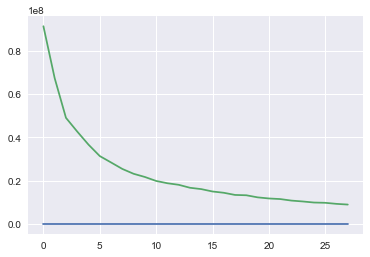

In [168]:
plt.plot(inertia[1:30]) #5 cluster is preferred  ##LINE CHART 1

In [169]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(data)

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [170]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 2     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

In [171]:
print(x_min)
print(x_max)
print(y_min)
print(y_max)

-43.1394683482
1553.02305164
-466.029974863
888.857928049


In [172]:
#continues Sep size
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

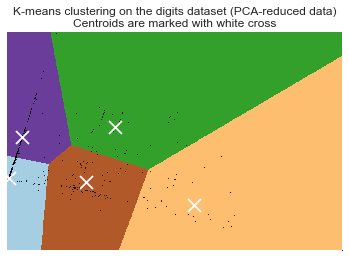

In [173]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
#plt.figure(figsize=(8, 8))
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [52]:
# from sklearn.metrics.pairwise import pairwise_distances_argmin
# #set the cluster number as 5
# k_means = KMeans(init='k-means++', n_clusters=5, n_init=10)
# t0 = time()
# k_means.fit(data)
# t_batch = time() - t0
    
# plt.figure(figsize=(8, 8))
# colors = ['b', 'g', 'r','c','y']

# k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
# k_means_labels = pairwise_distances_argmin(data, k_means_cluster_centers)


# # KMeans
# for k, col in zip(range(n_clusters), colors):
#     my_members = k_means_labels == k
#     cluster_center = k_means_cluster_centers[k]
#     plt.plot(data[my_members, 0], data[my_members, 1], 'w',
#             markerfacecolor=col, marker='.')
#     plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
#             markeredgecolor='k', markersize=8)
    
# plt.text(0, 36,  'train time: %.2fs\ninertia: %f' % (
#     t_batch, k_means.inertia_))

In [174]:
df2['price']=[ float(re.sub('[^0-9\.]+', '',x).strip()) if (type(x)==type('') and x!='') else 0 for x in df2['price'] ] 
#remove dollar sign in price

In [ ]:
#rating 

In [175]:
#convert rating into numbers
df2['rating']=[round(float(re.sub('[^0-9]+', '',x).strip())*0.1,2)\
 if (type(x)==type('') and x!='') else x \
 for x in df2['rating']]

In [176]:
df2.head()

,brand,category,ingredient,name,page,price,rating,reviews_number,unit,ind_tag_list,...,CHONDROITIN,ZINC,CARNITINE,LINEOLEICACID,SELENIUM,EPA,DHA,SODIUM,VITAMINA10,CARBOHYDRATE
0,By Taste of the Wild,"Dog,Food","Crude Protein,32.0% min,Crude Fat,18.0% min,Cr...",Taste of the Wild High Prairie Grain-Free Dry ...,1,48.99,4.7,1701.0,30-lb bag,"PROTEIN,32.0% MIN,FAT,18.0% MIN,FIBER,4.0% MAX...",...,0.0,150.0,0.0,0.0,0.35,0.0,0.0,0.0,0.0,0.0
1,By CANIDAE,"Dog,Food","Crude Protein ,24.0% min,Crude Fat ,14.5% min,...",CANIDAE Life Stages All Life Stages Formula Dr...,1,56.99,4.7,552.0,44-lb bag,"PROTEIN ,24.0% MIN,FAT ,14.5% MIN,FIBER ,4.0% ...",...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,By Blue Buffalo,"Dog,Food","Crude Protein,20.0% min,Crude Fat,12.0% min,Cr...",Blue Buffalo Basics Limited Ingredient Grain-F...,1,51.99,4.7,207.0,22-lb bag,"PROTEIN,20.0% MIN,FAT,12.0% MIN,FIBER,6.0% MAX...",...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,By Blue Buffalo,"Dog,Food","Crude Protein,28.0% min,Crude Fat,13.0% min,Cr...",Blue Buffalo Wilderness Rocky Mountain Recipe ...,1,51.99,4.7,224.0,NaN,"PROTEIN,28.0% MIN,FAT,13.0% MIN,FIBER,6.0% MAX...",...,550.0,0.0,100.0,0.0,0.00,0.1,0.0,0.0,0.0,0.0
4,By Blue Buffalo,"Dog,Food","Crude Protein,24.0% min,Crude Fat,14.0% min,Cr...",Blue Buffalo Freedom Adult Chicken Recipe Grai...,1,47.99,4.8,247.0,24-lb bag,"PROTEIN,24.0% MIN,FAT,14.0% MIN,FIBER,6.0% MAX...",...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [177]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

#set the cluster number as 5
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10)
t0 = time()
k_means.fit(data)
t_batch = time() - t0

k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(data, k_means_cluster_centers)
df2['cluster_labels']=pd.Series(k_means_labels, index=df2.index)

In [197]:
df2['rating']=[str(x) for x in df2['rating']] #convert to categorical variables

In [206]:
df2['rating']=[x if x!='nan' else str(0) for x in df2['rating']] #convert nan value 

In [209]:
df2['rating']=[x if x!='2745.0' else str(0) for x in df2['rating']] #convert nan(2745) value 

In [211]:
df2['rating']=[ float(x) for x in df2['rating']]

In [212]:
df2['rating'].unique()

array([ 4.7 ,  4.8 ,  4.6 ,  4.5 ,  4.4 ,  4.9 ,  4.1 ,  4.2 ,  4.3 ,
        5.  ,  3.8 ,  3.9 ,  3.6 ,  0.  ,  4.  ,  2.3 ,  3.7 ,  2.4 ,
        3.  ,  3.5 ,  2.5 ,  3.3 ,  2.7 ,  2.  ,  1.5 ,  3.1 ,  1.  ,
        3.2 ,  3.4 ,  0.01,  2.2 ,  2.8 ,  2.6 ])

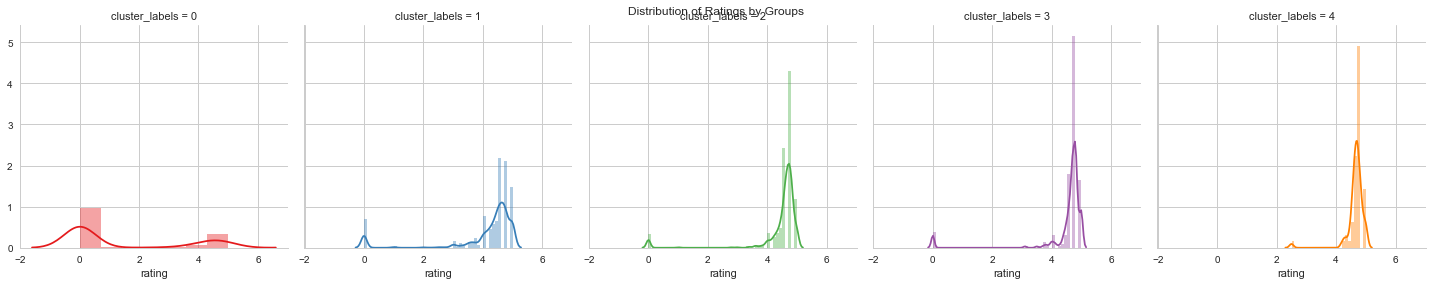

In [223]:
import seaborn as sns
#plt.title('Distribution of Ratings by Groups')
ClusterGrid = sns.FacetGrid(df2, col='cluster_labels', hue="cluster_labels", palette="Set1", size=4)
ClusterGrid.fig.suptitle('Distribution of Ratings by Groups') 
ClusterGrid.map(sns.distplot, "rating")
sns.set_style("whitegrid")
#sns.distplot(df['rating'])
#sns.distplot(df['rating'])
#sns.boxplot(x='cluster_labels', y='rating', data=df2)

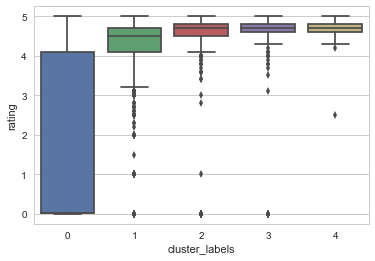

In [214]:
sns.boxplot(x='cluster_labels', y='rating', data=df2)

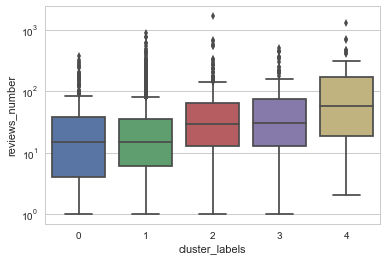

In [183]:
import seaborn as sns
sns.set_style("whitegrid")
g=sns.boxplot(x='cluster_labels', y='reviews_number', data=df2)
g.set_yscale('log')

In [105]:
df2.groupby('cluster_labels').mean()['price']

cluster_labels
0    11.363384
1    28.715348
2    34.823267
3    41.434148
4    50.843810
Name: price, dtype: float64

In [273]:
df2.groupby('cluster_labels').mean()['reviews_number']

cluster_labels
0     36.309659
1     33.260946
2     55.968284
3     62.895455
4    143.619048
Name: reviews_number, dtype: float64

In [93]:
df2.head()

,brand,category,ingredient,name,page,price,rating,reviews_number,unit,ind_tag_list,...,ZINC,CARNITINE,LINEOLEICACID,SELENIUM,EPA,DHA,SODIUM,VITAMINA10,CARBOHYDRATE,cluster_labels
0,By Taste of the Wild,"Dog,Food","Crude Protein,32.0% min,Crude Fat,18.0% min,Cr...",Taste of the Wild High Prairie Grain-Free Dry ...,NaN,48.99,4.7,NaN,30-lb bag,"PROTEIN,32.0% MIN,FAT,18.0% MIN,FIBER,4.0% MAX...",...,150.0,0.0,0.0,0.35,0.0,0.0,0.0,0.0,0.0,2
1,By CANIDAE,"Dog,Food","Crude Protein ,24.0% min,Crude Fat ,14.5% min,...",CANIDAE Life Stages All Life Stages Formula Dr...,NaN,56.99,4.7,NaN,44-lb bag,"PROTEIN ,24.0% MIN,FAT ,14.5% MIN,FIBER ,4.0% ...",...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2
2,By Blue Buffalo,"Dog,Food","Crude Protein,20.0% min,Crude Fat,12.0% min,Cr...",Blue Buffalo Basics Limited Ingredient Grain-F...,NaN,51.99,4.7,NaN,22-lb bag,"PROTEIN,20.0% MIN,FAT,12.0% MIN,FIBER,6.0% MAX...",...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3
3,By Blue Buffalo,"Dog,Food","Crude Protein,28.0% min,Crude Fat,13.0% min,Cr...",Blue Buffalo Wilderness Rocky Mountain Recipe ...,NaN,51.99,4.7,NaN,NaN,"PROTEIN,28.0% MIN,FAT,13.0% MIN,FIBER,6.0% MAX...",...,0.0,100.0,0.0,0.00,0.1,0.0,0.0,0.0,0.0,4
4,By Blue Buffalo,"Dog,Food","Crude Protein,24.0% min,Crude Fat,14.0% min,Cr...",Blue Buffalo Freedom Adult Chicken Recipe Grai...,NaN,47.99,4.8,NaN,24-lb bag,"PROTEIN,24.0% MIN,FAT,14.0% MIN,FIBER,6.0% MAX...",...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3


In [231]:
#pick group 4 for ingredient analysis
Group4_data=df2.loc[lambda df2: df2.cluster_labels==4,]

In [330]:
res=pd.DataFrame(df2.groupby(['cluster_labels','brand']).size().rename('counts')).reset_index()\
 .sort_values(by=['cluster_labels','counts'],ascending=[False,False])

res.tail(n=230) #brand in 5 different category

,cluster_labels,brand,counts
259,2,By Natural Planet,1
262,2,By Now Fresh,1
269,2,By Party Animal,1
270,2,By Perfectly Natural Dog,1
285,2,By Royal Canin Veterinary Diet,1
287,2,By Sportsman's Pride,1
293,2,By Whiskas,1
83,1,By Blue Buffalo,148
212,1,By Wellness,126
106,1,By Fancy Feast,116


In [331]:
#pd.DataFrame(df2.groupby(['cluster_labels','brand']).size().rename('counts').sort_values(ascending=False))

In [271]:
Group4_data.groupby('brand').mean()[['price','rating','reviews_number']]

,price,rating,reviews_number
brand,,,
By ACANA,72.590000,4.620000,246.200000
By American Journey,39.990000,4.540000,197.600000
By Blue Buffalo,51.418571,4.742857,93.285714
By Castor & Pollux,60.000000,4.800000,20.000000
By Farmina,41.130000,4.706250,23.750000
By Hill's Science Diet,39.350000,4.700000,54.333333
By Instinct,54.990000,4.750000,19.500000
By Lotus,52.840000,4.750000,15.000000
By Merrick,48.718182,4.536364,83.272727


In [265]:
ind_data=df2[['cluster_labels','PROTEIN',
       'FAT', 'FIBER', 'MOISTURE', 'TAURINE', 'ASH', 'OMEGA6', 'OMEGA3',
       'CALCIUM', 'PHOSPHOROUS', 'VITAMINE', 'MAGNESIUM', 'VITAMINC',
       'GLUCOSAMINE', 'DHADHA', 'CHONDROITIN', 'ZINC', 'CARNITINE',
       'LINEOLEICACID', 'SELENIUM', 'EPA', 'DHA', 'SODIUM', 'VITAMINA10',
       'CARBOHYDRATE']]
ingredient_table=ind_data.groupby('cluster_labels').mean().T
ingredient_table['mean_ind']=ingredient_table.mean(axis=1)
ingredient_table.sort_values(by=4,ascending=False)

cluster_labels,0,1,2,3,4,mean_ind
GLUCOSAMINE,0.000000,1.191070,2.048736,416.222707,723.015873,228.495677
CHONDROITIN,0.000000,0.784701,3.862816,108.213974,635.317460,149.635790
VITAMINE,0.000000,0.562544,190.121769,156.965066,68.650794,83.260034
PROTEIN,1.003095,15.860387,28.288989,26.513100,31.714286,20.675971
VITAMINC,0.000000,0.563680,38.532491,21.829694,18.809524,15.947078
CARNITINE,0.000000,0.825673,15.075812,22.759825,16.746032,11.081468
FAT,0.532449,7.474343,13.841155,13.774672,15.587302,10.241984
ZINC,0.000000,0.479645,53.348375,20.231441,15.396825,17.891257
MOISTURE,0.168700,60.142663,16.695036,12.100437,9.952381,19.811843
FIBER,0.335942,2.165194,4.167419,4.741048,4.346032,3.151127


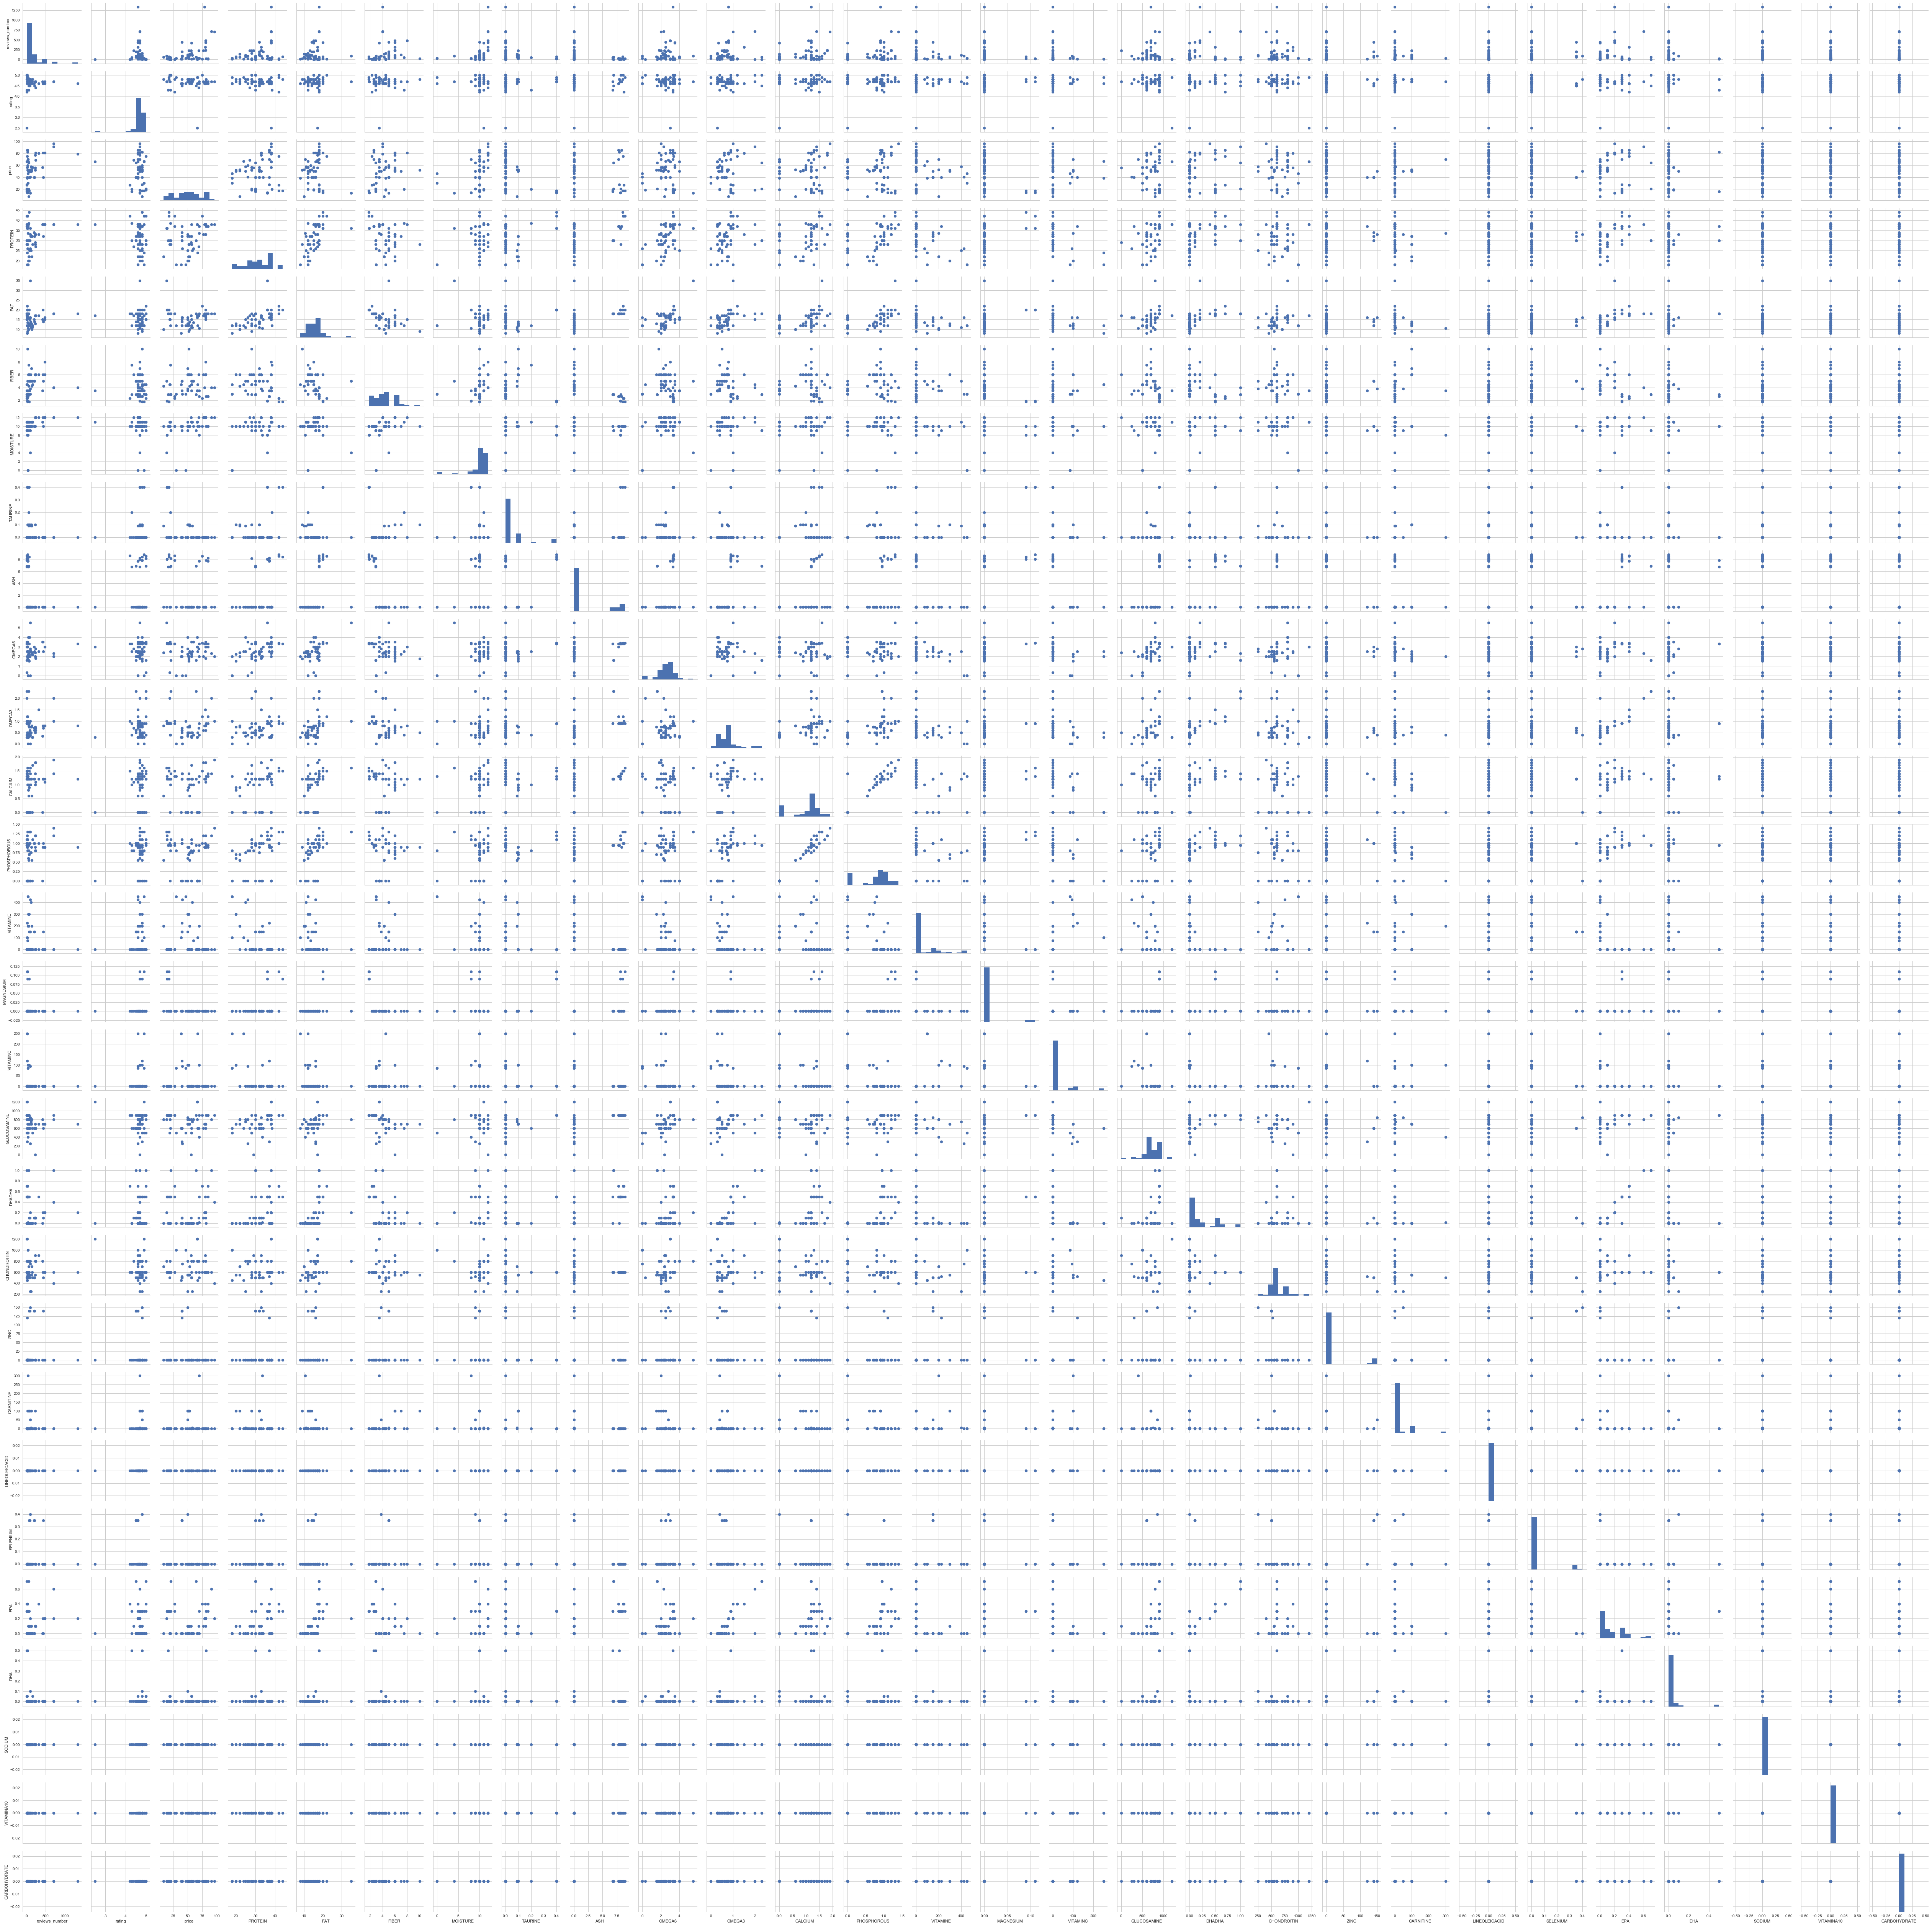

In [268]:
Group4_scatter=Group4_data[['reviews_number','rating','price','PROTEIN',
       'FAT', 'FIBER', 'MOISTURE', 'TAURINE', 'ASH', 'OMEGA6', 'OMEGA3',
       'CALCIUM', 'PHOSPHOROUS', 'VITAMINE', 'MAGNESIUM', 'VITAMINC',
       'GLUCOSAMINE', 'DHADHA', 'CHONDROITIN', 'ZINC', 'CARNITINE',
       'LINEOLEICACID', 'SELENIUM', 'EPA', 'DHA', 'SODIUM', 'VITAMINA10',
       'CARBOHYDRATE']]

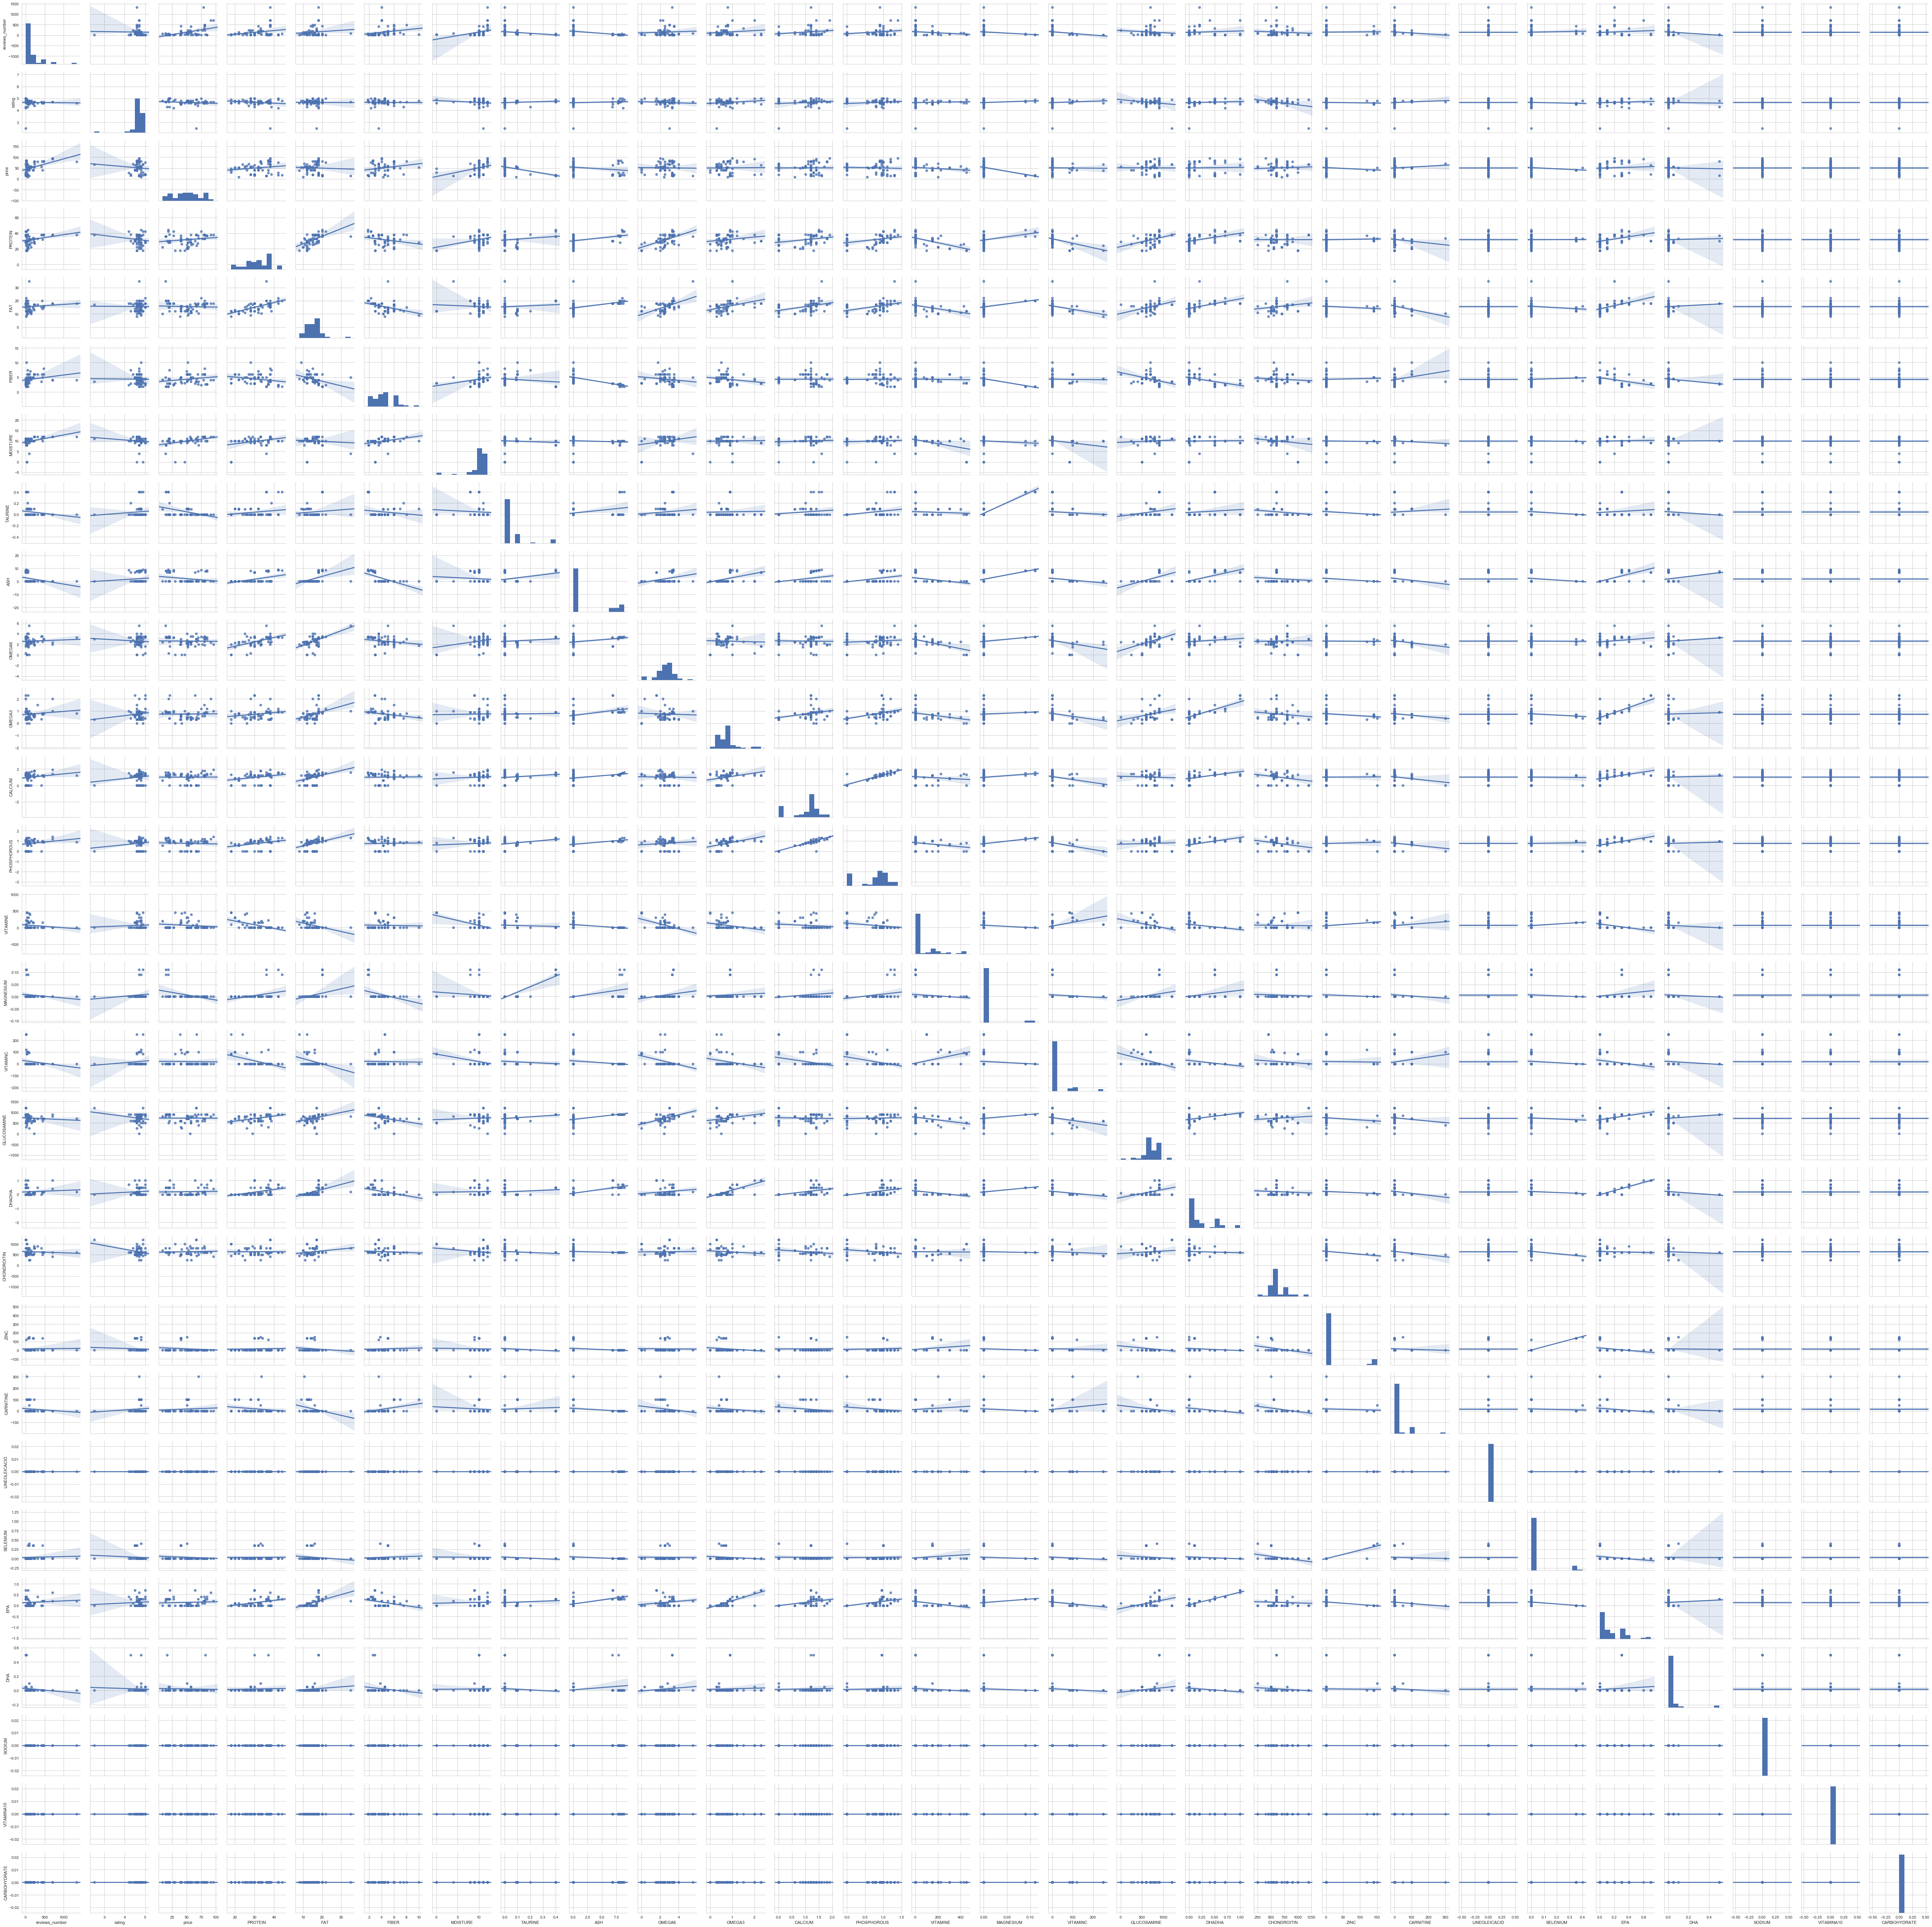

In [269]:
g = sns.PairGrid(Group4_scatter)
g.map_diag(plt.hist)
g.map_offdiag(sns.regplot)